In [69]:
#lauren Wright

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
complaints_df = pd.read_csv('D:\\My Documents\\codelouisville\\python\\project\\consumer_complaints-master\\Consumer_Complaints.csv')

In [71]:
complaints_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,StateUS,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Response,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217.0
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773.0
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100.0
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638.0
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760.0


In [72]:
complaints_df.loc[(complaints_df['Response'] == 'Closed with monetary relief')&(complaints_df['StateUS'] != 'NaN')]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,StateUS,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Response,Timely response?,Consumer disputed?,Complaint ID
5,11/13/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,U.S. BANCORP,MN,48322,NaN,NaN,Phone,11/20/2013,Closed with monetary relief,Yes,No,596562.0
25,11/18/2016,Mortgage,Conventional fixed mortgage,Settlement process and costs,NaN,Started the refinance of home mortgage process...,NaN,AMERICAN NEIGHBORHOOD MORTGAGE,NJ,088XX,NaN,Consent provided,Web,11/21/2016,Closed with monetary relief,No,No,2216206.0
38,6/19/2012,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",CO,80214,NaN,NaN,Web,6/21/2012,Closed with monetary relief,Yes,No,104285.0
59,3/21/2016,Bank account or service,Checking account,Problems caused by my funds being low,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,7604,NaN,Consent not provided,Web,3/21/2016,Closed with monetary relief,Yes,Yes,1841482.0
66,11/14/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,JPMORGAN CHASE & CO.,RI,2840,NaN,NaN,Web,11/18/2013,Closed with monetary relief,Yes,No,598206.0
101,2/10/2015,Money transfers,Domestic (US) money transfer,Fraud or scam,NaN,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Older American,NaN,Web,2/10/2015,Closed with monetary relief,Yes,No,1232991.0
109,6/26/2014,Bank account or service,Checking account,Problems caused by my funds being low,NaN,NaN,NaN,PNC Bank N.A.,NaN,NaN,NaN,NaN,Referral,7/1/2014,Closed with monetary relief,Yes,No,913460.0
137,6/28/2013,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,"CITIBANK, N.A.",CA,92107,NaN,NaN,Web,7/1/2013,Closed with monetary relief,Yes,No,446256.0
144,4/7/2017,Credit card,NaN,APR or interest rate,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",AZ,85296,NaN,NaN,Referral,4/7/2017,Closed with monetary relief,Yes,No,2425048.0
153,6/1/2016,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,This complaint is regarding Wells Fargo. XX/XX...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NV,891XX,NaN,Consent provided,Web,6/1/2016,Closed with monetary relief,Yes,No,1949163.0


In [73]:
complaints_all_df = pd.read_csv('D:\\My Documents\\codelouisville\\python\\project\\consumer_complaints-master\\Consumer_Complaints_states_all_response.csv')

In [74]:
complaints_all_df.head()

,StateUS,Response
0,CA,146467
1,FL,100372
2,TX,85790
3,NY,70536
4,GA,53298


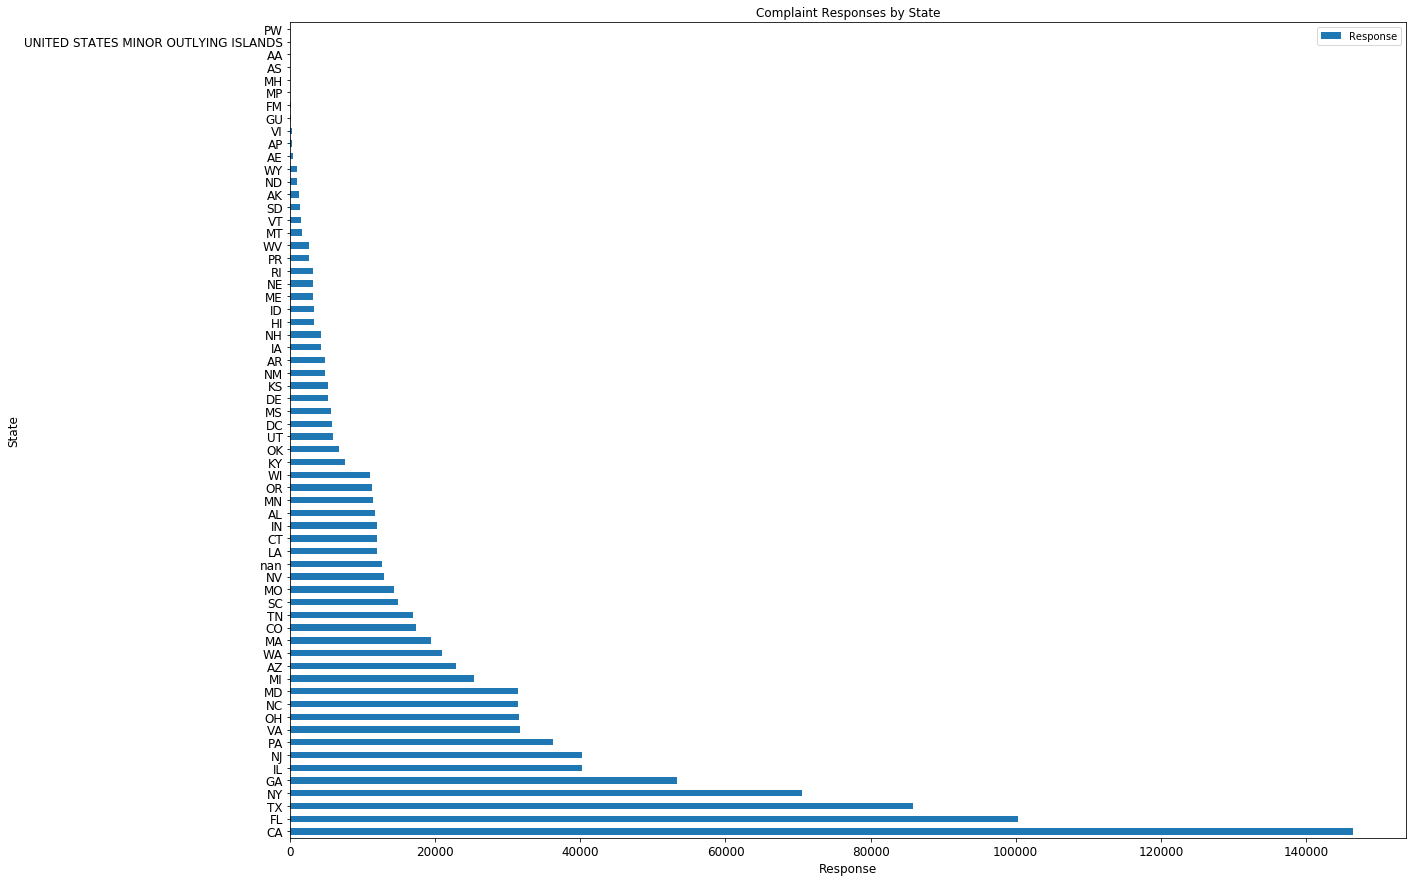

In [75]:
ax = complaints_all_df[['StateUS','Response']].plot(kind='barh', title ='Complaint Responses by State', figsize=(20, 15), legend=True, fontsize=12)
ax.set_yticklabels(complaints_all_df.StateUS)
ax.set_xlabel("Response", fontsize=12)
ax.set_ylabel("State", fontsize=12)
plt.show()

In [76]:
complaints_money_df = pd.read_csv('D:\\My Documents\\codelouisville\\python\\project\\consumer_complaints-master\\monetary.csv')

In [77]:
complaints_money_df.head()

,StateUS,monetary_relief
0,CA,8588
1,NY,5395
2,FL,5369
3,TX,4055
4,NJ,2831


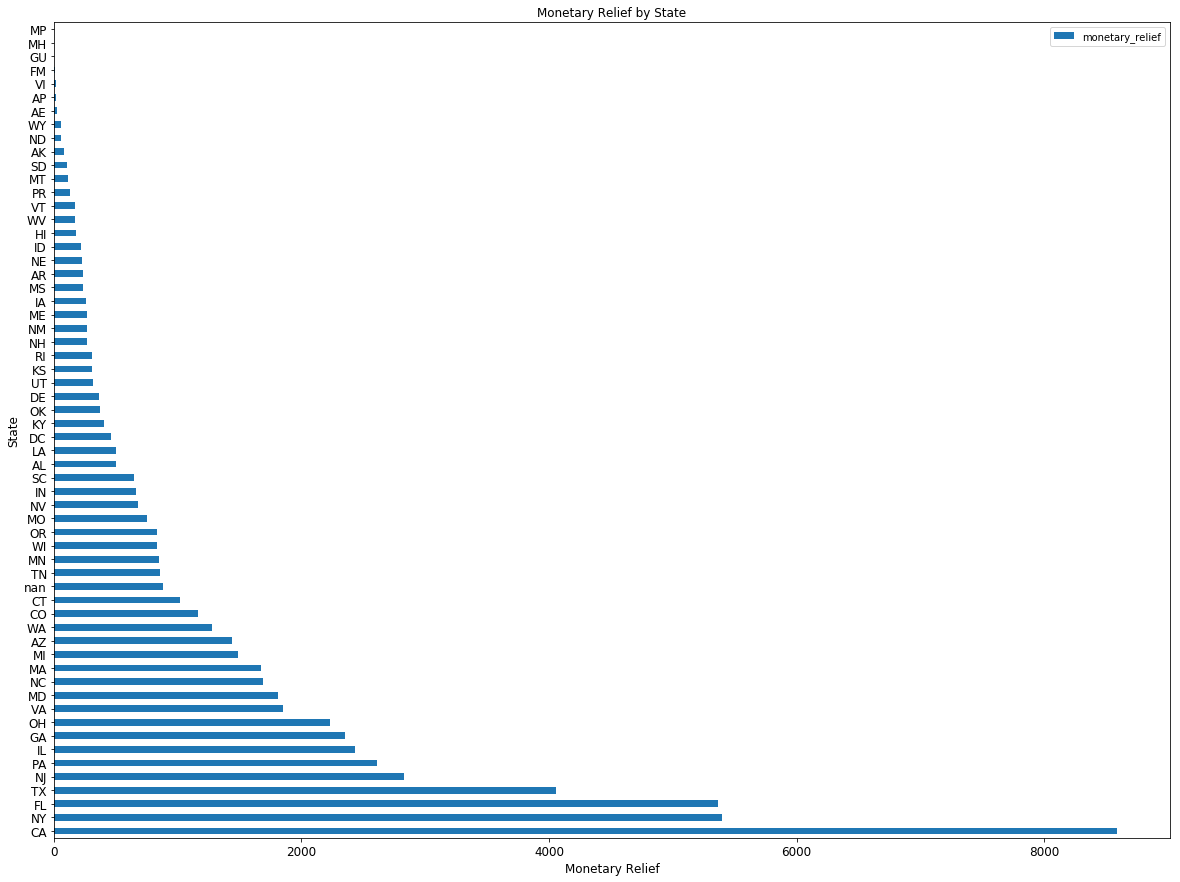

In [78]:
ax = complaints_money_df[['StateUS','monetary_relief']].plot(kind='barh', title ='Monetary Relief by State', figsize=(20, 15), legend=True, fontsize=12)
ax.set_yticklabels(complaints_money_df.StateUS)
ax.set_xlabel("Monetary Relief", fontsize=12)
ax.set_ylabel("State", fontsize=12)
plt.show()
